#### 📊 **Análisis de Componentes Principales (PCA) en R**

**Profesora: Rocío Leonel Gómez** 

**Alumna:** Alejandra Quetzal González Pineda

---

Este notebook muestra paso a paso cómo realizar PCA en R, tanto manualmente como con `prcomp()`.

Paso 0: Matriz Original: Se parte de la matriz de datos dada.

Paso 1:Normalización: Se estandariza la matriz para que cada columna tenga media 0 y desviación estándar 1.

Paso 2:Cálculo de la Matriz de Covarianza: Se calcula la matriz de covarianza de los datos normalizados.

Paso 3:Cálculo de Valores y Vectores Propios: Se obtienen los valores propios y vectores propios de la matriz de covarianza.

Paso 4:Ordenación de Valores Propios: Se ordenan en orden descendente para identificar las componentes principales más importantes.

Paso 5: Selección de los Componentes Principales: Se eligen los primeros dos vectores propios.

Paso 6: Transformación de Datos: Se proyectan los datos originales en el nuevo espacio definido por las componentes principales.

#### **Paso 0: Matriz Original**


In [1]:
# Definir los datos
A <- data.frame(
  X1 = c(12, 7, 4),
  X2 = c(5, 15, 11),
  X3 = c(23, 3, 16),
  X4 = c(8, 19, 2)
)

# Mostrar la matriz original
print("Matriz Original:")
print(A)

[1] "Matriz Original:"
  X1 X2 X3 X4
1 12  5 23  8
2  7 15  3 19
3  4 11 16  2


#### **Paso 1: Normalización**


In [2]:
# Normalización de los datos
A_scaled <- scale(A)

# Mostrar matriz normalizada
print("Matriz Normalizada:")
print(A_scaled)

[1] "Matriz Normalizada:"
             X1         X2         X3         X4
[1,]  1.0722219 -1.0596259  0.8867964 -0.1933112
[2,] -0.1649572  0.9271726 -1.0838622  1.0825425
[3,] -0.9072647  0.1324532  0.1970659 -0.8892314
attr(,"scaled:center")
       X1        X2        X3        X4 
 7.666667 10.333333 14.000000  9.666667 
attr(,"scaled:scale")
       X1        X2        X3        X4 
 4.041452  5.033223 10.148892  8.621678 


#### **Paso 2: Cálculo de la Matriz de Covarianza**


In [3]:
# Cálculo de la matriz de covarianza
cov_matrix <- cov(A_scaled)

# Mostrar matriz de covarianza
print("Matriz de Covarianza:")
print(cov_matrix)

[1] "Matriz de Covarianza:"
           X1         X2         X3         X4
X1  1.0000000 -0.7046340  0.4754212  0.2104613
X2 -0.7046340  1.0000000 -0.9592489  0.5453799
X3  0.4754212 -0.9592489  1.0000000 -0.7599959
X4  0.2104613  0.5453799 -0.7599959  1.0000000


#### **Paso 3: Cálculo de Valores y Vectores Propios**


In [4]:
# Cálculo de valores y vectores propios
eig <- eigen(cov_matrix)
valores_propios <- eig$values
vectores_propios <- eig$vectors

# Mostrar valores propios
print("Valores Propios:")
print(valores_propios)

# Mostrar vectores propios
print("Vectores Propios:")
print(vectores_propios)

[1] "Valores Propios:"
[1]  2.749680e+00  1.250320e+00  2.220446e-15 -2.220446e-16
[1] "Vectores Propios:"
           [,1]       [,2]       [,3]      [,4]
[1,]  0.3539522  0.7240697  0.5919804 0.0000000
[2,] -0.5958609 -0.1377517  0.5247608 0.5921151
[3,]  0.5978260 -0.1175454 -0.2136739 0.7636299
[4,] -0.4028295  0.6655303 -0.5731742 0.2574279


#### **Paso 4: Ordenación de Valores Propios**


In [5]:
# Ordenar valores propios en orden descendente
orden <- order(valores_propios, decreasing = TRUE)
valores_propios <- valores_propios[orden]
vectores_propios <- vectores_propios[, orden]

# Mostrar valores propios ordenados
print("Valores Propios Ordenados:")
print(valores_propios)

# Mostrar vectores propios ordenados
print("Vectores Propios Ordenados:")
print(vectores_propios)

[1] "Valores Propios Ordenados:"
[1]  2.749680e+00  1.250320e+00  2.220446e-15 -2.220446e-16
[1] "Vectores Propios Ordenados:"
           [,1]       [,2]       [,3]      [,4]
[1,]  0.3539522  0.7240697  0.5919804 0.0000000
[2,] -0.5958609 -0.1377517  0.5247608 0.5921151
[3,]  0.5978260 -0.1175454 -0.2136739 0.7636299
[4,] -0.4028295  0.6655303 -0.5731742 0.2574279


#### **Paso 5: Selección de Componentes Principales**


In [6]:
# Seleccionar los primeros dos componentes principales
componentes_principales <- vectores_propios[, 1:2]
componentes_principales

0.3539522,0.7240697
-0.5958609,-0.1377517
0.5978260,-0.1175454
-0.4028295,0.6655303


#### **Paso 6: Transformación de Datos**


In [7]:
# Transformar datos al nuevo espacio PCA
datos_transformados <- A_scaled %*% componentes_principales
colnames(datos_transformados) <- c("PC1", "PC2")

# Mostrar datos transformados
print("Datos Transformados:")
print(datos_transformados)

[1] "Datos Transformados:"
             PC1        PC2
[1,]  1.61892640  0.6894354
[2,] -1.69489404  0.6007078
[3,]  0.07596764 -1.2901432


#### **Paso 7: Visualización**


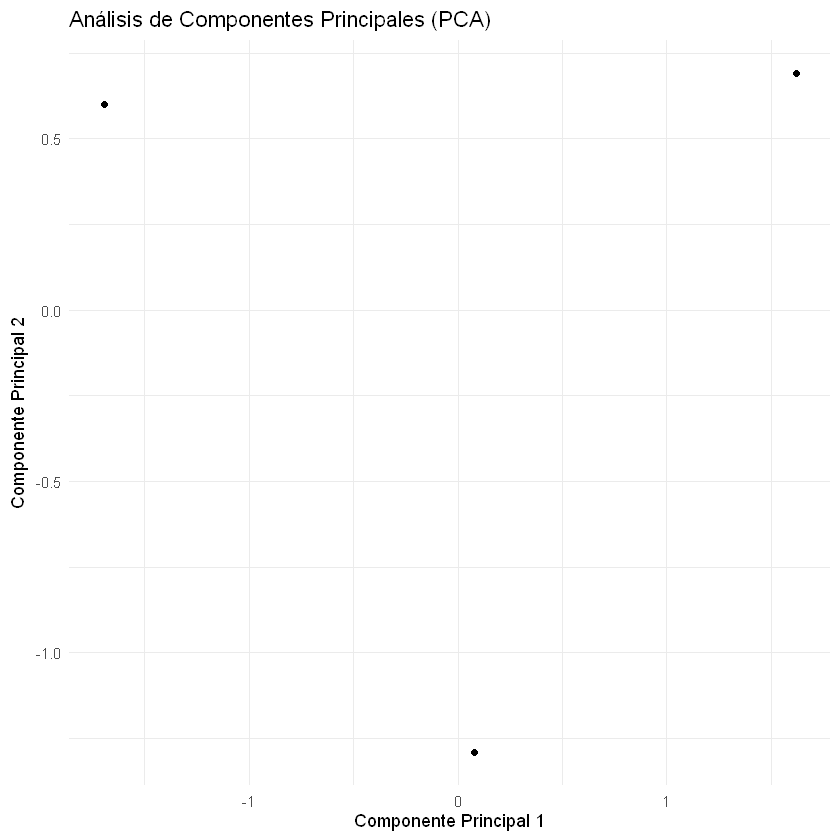

In [11]:
library(ggplot2)

# Convertir a data frame para graficar
pca_df <- as.data.frame(datos_transformados)

# Crear gráfico de los primeros dos componentes principales
ggplot(pca_df, aes(x = PC1, y = PC2)) +
  geom_point() +
  ggtitle("Análisis de Componentes Principales (PCA)") +
  xlab("Componente Principal 1") +
  ylab("Componente Principal 2") +
  theme_minimal()

## **Comparación con `prcomp()`**


In [9]:
# Aplicar PCA con prcomp()
pca_result <- prcomp(A, center = TRUE, scale. = TRUE)
pca_result

Standard deviations (1, .., p=3):
[1] 1.658216e+00 1.118177e+00 3.016167e-16

Rotation (n x k) = (4 x 3):
          PC1        PC2        PC3
X1  0.3539522 -0.7240697 -0.5451875
X2 -0.5958609  0.1377517 -0.7140098
X3  0.5978260  0.1175454 -0.1007783
X4 -0.4028295 -0.6655303  0.4275563

In [10]:
# Mostrar resumen
summary(pca_result)

Importance of components:
                          PC1    PC2       PC3
Standard deviation     1.6582 1.1182 3.016e-16
Proportion of Variance 0.6874 0.3126 0.000e+00
Cumulative Proportion  0.6874 1.0000 1.000e+00